#### Benin Eda Solar Data Discovery

In [3]:
# Import Required Libraries
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
from scipy import stats

In [ ]:
# Reading DataSets 
benin_dataset = pd.read_csv("../data/benin-malanville.csv", parse_dates=['Timestamp'],date_format="%y %m %d %h %m")

### Data Profiling

In [ ]:
# display the first records
benin_dataset.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [ ]:
# display the last records 
benin_dataset.tail()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-10-29 23:56,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525596,2022-10-29 23:57,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525597,2022-10-29 23:58,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525598,2022-10-29 23:59,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525599,2022-10-30 00:00,-1.7,-0.1,-3.4,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN


In [ ]:
# display the shape of the data to get info about number features and instance 
print(f"Sierraleone Solar data Information: ")
print(f"Instances: {benin_dataset.shape[0]} records ")
print(f"Features:  {benin_dataset.shape[1] } columns")

Sierraleone Solar data Information: 
Instances: 525600 records 
Features:  19 columns


In [ ]:
# Dataset information about type of each columns, size 
benin_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [ ]:
# Getting number of unique values 
number_of_unique = pd.DataFrame({
    'columns': benin_dataset.columns,
    '# of unique': benin_dataset.nunique()
})
number_of_unique

,columns,# of unique
Timestamp,Timestamp,525600
GHI,GHI,8742
DNI,DNI,8205
DHI,DHI,7183
ModA,ModA,10188
ModB,ModB,8524
Tamb,Tamb,276
RH,RH,902
WS,WS,145
WSgust,WSgust,88


In [ ]:
# getting number of missing values for all dataset
print("="*100)
print("Missing Values Detection ".center(150))
print("="*100, end="\n")
print(f"Total number of missing values in the Dataset: {benin_dataset.isna().sum().sum()}")
print("="*100, end="\n")

# columns having missing values more than 5%

print(f"A Dataset Feature Having missing values more than 5 %".center(150))
print("="*100)
for col in benin_dataset.columns:
    percent =(benin_dataset[col].isna().sum()/benin_dataset.shape[0]) * 100
    if  percent.round(2) >= 5:
        print(f"Missing Values of column {col}: -> {percent} %")
print("="*100,end="\n")




                                                              Missing Values Detection                                                                
Total number of missing values in the Dataset: 525600
                                                A Dataset Feature Having missing values more than 5 %                                                 
Missing Values of column Comments: -> 100.0 %


In [ ]:
# Number of missing values for each features 
no_missing = pd.DataFrame({
    'columns':benin_dataset.columns,
    '# missing': benin_dataset.isna().sum(), 
    '% missing': benin_dataset.isna().mean()*100
})
no_missing

,columns,# missing,% missing
Timestamp,Timestamp,0,0.0
GHI,GHI,0,0.0
DNI,DNI,0,0.0
DHI,DHI,0,0.0
ModA,ModA,0,0.0
ModB,ModB,0,0.0
Tamb,Tamb,0,0.0
RH,RH,0,0.0
WS,WS,0,0.0
WSgust,WSgust,0,0.0


In [ ]:

# Number of Duplicated values 
print("="*100)
print("Duplicated Values".center(160))
print("="*100)
print(f"Number of Duplicated values in the dataset: {benin_dataset.duplicated().sum()}".center(150))
print("="*100, end="\n")

                                                                       Duplicated Values                                                                        
                                                    Number of Duplicated values in the dataset: 0                                                     


In [ ]:
# finding negative values 
negative_values = pd.DataFrame({
    'columns': benin_dataset.columns,
    'dtypes': benin_dataset.dtypes,
    'num of -ve values': benin_dataset.select_dtypes(include='number').lt(0).sum(),
    "% of -ve values": round(benin_dataset.select_dtypes(include='number').lt(0).mean() *100, 2),
})

negative_values

,columns,dtypes,num of -ve values,% of -ve values
BP,Timestamp,int64,0.0,0.00
Cleaning,GHI,int64,0.0,0.00
Comments,DNI,float64,0.0,0.00
DHI,DHI,float64,263128.0,50.06
DNI,ModA,float64,266352.0,50.68
GHI,ModB,float64,261135.0,49.68
ModA,Tamb,float64,0.0,0.00
ModB,RH,float64,0.0,0.00
Precipitation,WS,float64,0.0,0.00
RH,WSgust,float64,0.0,0.00


In [ ]:
# Describe all numerical Statistical Summery 
benin_dataset.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


- The above data profiling outputs describes:
  - The dataset one columns with missing values of all records
  -  There is no duplicated record in the dataset
  -  The Dataset contains 19 features and 525600 records 

#### EDA Data Analysis

In [15]:
import matplotlib.pyplot as plt
# import seaborn as sbn

Describing outliers, missing values and incorrect entries on `GHI, DNI, DHI`and outlier on `ModB, ModA` and wend speed data `WS, and WSgust`

In [ ]:
# Checking incorrect entries of GHI, DNI, and DHI
benin_dataset[['GHI', 'DNI', 'DHI', 'ModA','ModB','WS', 'WSgust']].describe()

,GHI,DNI,DHI,ModA,ModB,WS,WSgust
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,201.957515,116.376337,113.720571,206.643095,198.114691,1.146113,1.691606
std,298.495150,218.652659,158.946032,300.896893,288.889073,1.239248,1.617053
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,0.000000,0.000000
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,0.000000,0.000000
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,0.800000,1.600000
75%,362.400000,107.000000,224.700000,359.500000,345.400000,2.000000,2.600000
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,19.200000,23.900000


#### Outlier detection using 

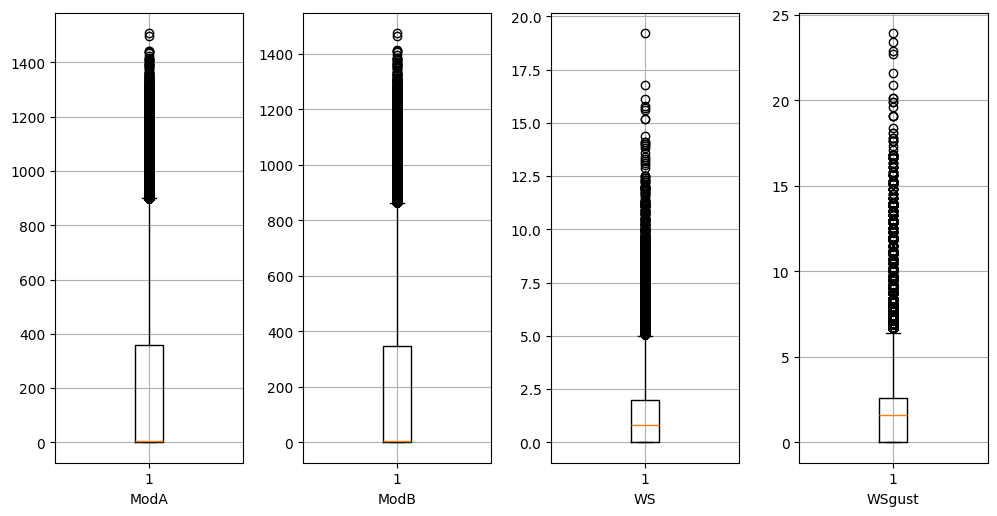

In [ ]:
# Outliers for Modb, and ModA, WS, WSgust using boxplot
plt.figure(figsize=(20, 15))
for i, col in enumerate(['ModA', 'ModB', 'WS', 'WSgust'], start = 1):
    plt.subplot(3,8,i)
    plt.boxplot(benin_dataset[col])
    plt.xlabel(col)
    plt.grid(True)
plt.tight_layout()
plt.show()
    

#### Outlier detection with Quantile

In [ ]:
column = ['GHI', 'DNI', 'DHI', 'ModA','ModB','WS', 'WSgust']

def IQR_outlier(columns):
    quantile1 = columns.quantile(0.25)
    quantile3 = columns.quantile(0.75)
    iqr = quantile3 - quantile1
    lowerbound = quantile1 - 1.5 * iqr 
    upperbound = quantile3 + 1.5 * iqr
    
    return (columns <lowerbound) | (columns>upperbound)

outlier = IQR_outlier(benin_dataset[column])

outlier = pd.DataFrame({
    'column':column,
    '# of outlier': IQR_outlier(benin_dataset[column]).sum(),
    '% of Outlier': round(IQR_outlier(benin_dataset[column]).mean() * 100,2),
})

outlier

,column,# of outlier,% of Outlier
GHI,GHI,15853,3.02
DNI,DNI,101688,19.35
DHI,DHI,4407,0.84
ModA,ModA,21017,4.00
ModB,ModB,20613,3.92
WS,WS,3169,0.60
WSgust,WSgust,3665,0.70


#### Outlier detection with Z-Score

In [ ]:
from scipy.stats import zscore  
def z_score_outlier(col):
    outlier = {}
    for co in col:    
            zscore1 = np.abs(zscore(benin_dataset[co]))
            outlier[co]= zscore1 > 3 
    return outlier
outlier_z_score = z_score_outlier(['DHI', 'GHI', 'DNI', 'ModA','ModB','WS', 'WSgust'])

cols = ['DHI', 'GHI', 'DNI', 'ModA','ModB','WS', 'WSgust']
z_score_Outlier = pd.DataFrame({
    'column': cols,
    '# of outlier': [outlier.sum() for outlier in outlier_z_score.values()],
    '% of Outlier':[round(outlier.mean() * 100, 2) for outlier in outlier_z_score.values()]
})
z_score_Outlier 

,column,# of outlier,% of Outlier
0,DHI,2986,0.57
1,GHI,2477,0.47
2,DNI,7586,1.44
3,ModA,1604,0.31
4,ModB,2041,0.39
5,WS,3967,0.75
6,WSgust,3665,0.70


In [ ]:
# Replace outliers with median
for col in cols:
    median_value = benin_dataset[col].median()
    benin_dataset.loc[outlier_z_score[col], col] = median_value

# Summary DataFrame
summary = pd.DataFrame({
    'column': cols,
    '# of Outliers': [mask.sum() for mask in outlier_z_score.values()],
    '% of Outliers': [round(mask.mean() * 100, 2) for mask in outlier_z_score.values()]
})

print(summary)

   column  # of Outliers  % of Outliers
0     DHI           2986           0.57
1     GHI           2477           0.47
2     DNI           7586           1.44
3    ModA           1604           0.31
4    ModB           2041           0.39
5      WS           3967           0.75
6  WSgust           3665           0.70


In [ ]:
benin_dataset.to_csv("../data/preprocessed_sierraleone.csv", index=False)

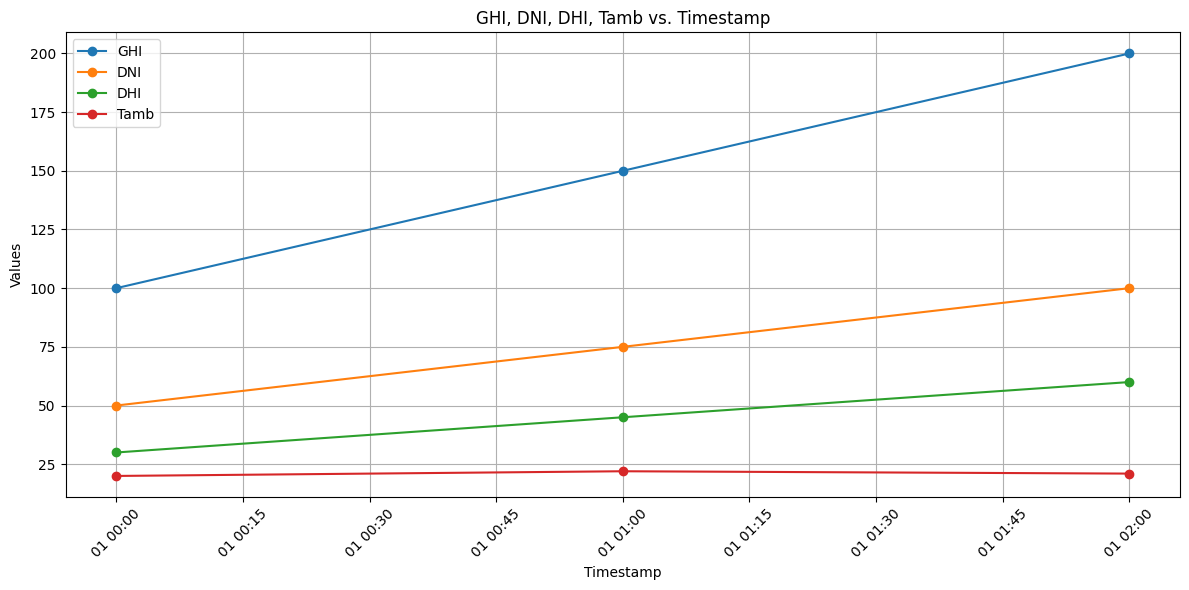

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'Timestamp': ['2023-01-01 00:00', '2023-01-01 01:00', '2023-01-01 02:00'],
    'GHI': [100, 150, 200],
    'DNI': [50, 75, 100],
    'DHI': [30, 45, 60],
    'Tamb': [20, 22, 21]
}

df = pd.DataFrame(data)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

plt.figure(figsize=(12, 6))

# Line chart
plt.plot(df['Timestamp'], df['GHI'], label='GHI', marker='o')
plt.plot(df['Timestamp'], df['DNI'], label='DNI', marker='o')
plt.plot(df['Timestamp'], df['DHI'], label='DHI', marker='o')
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb', marker='o')

plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('GHI, DNI, DHI, Tamb vs. Timestamp')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

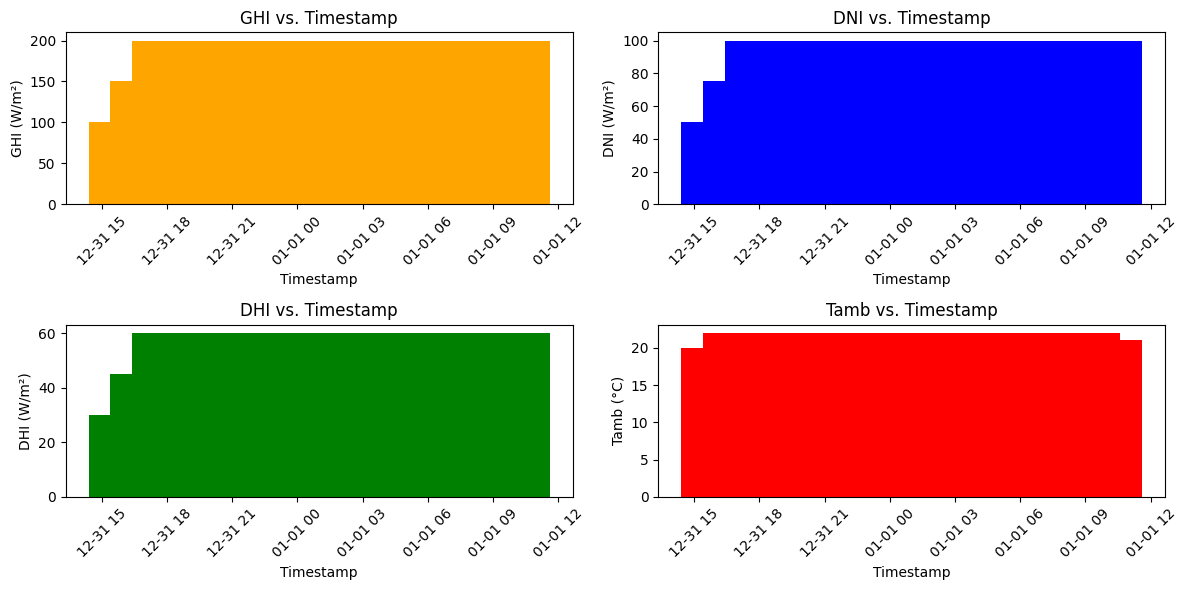

In [4]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Bar chart for GHI
plt.subplot(2, 2, 1)
plt.bar(df['Timestamp'], df['GHI'], color='orange')
plt.title('GHI vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('GHI (W/m²)')
plt.xticks(rotation=45)

# Bar chart for DNI
plt.subplot(2, 2, 2)
plt.bar(df['Timestamp'], df['DNI'], color='blue')
plt.title('DNI vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('DNI (W/m²)')
plt.xticks(rotation=45)

# Bar chart for DHI
plt.subplot(2, 2, 3)
plt.bar(df['Timestamp'], df['DHI'], color='green')
plt.title('DHI vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('DHI (W/m²)')
plt.xticks(rotation=45)

# Bar chart for Tamb
plt.subplot(2, 2, 4)
plt.bar(df['Timestamp'], df['Tamb'], color='red')
plt.title('Tamb vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Tamb (°C)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##### Observe patterns by month, trends throughout day, or anomalies, such as peaks in solar irradiance

In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [6]:
df['Month'] = df['Timestamp'].dt.month
# Group by month and calculate the mean
monthly_avg = df.groupby('Month')[['GHI','DHI','DNI','Tamb']].mean()
monthly_avg

,GHI,DHI,DNI,Tamb
Month,,,,
1,150.0,45.0,75.0,21.0


In [7]:
# Add an 'Hour' column
df['Hour'] = df['Timestamp'].dt.hour

# Group by hour and calculate the mean
hourly_avg = df.groupby('Hour')[['GHI','DHI','DNI','Tamb']].mean()

In [8]:
from scipy import stats
# Calculate Z-scores for GHI
df['GHI_Z'] = stats.zscore(df['GHI'])
anomalies = df[df['GHI_Z'].abs() > 2]

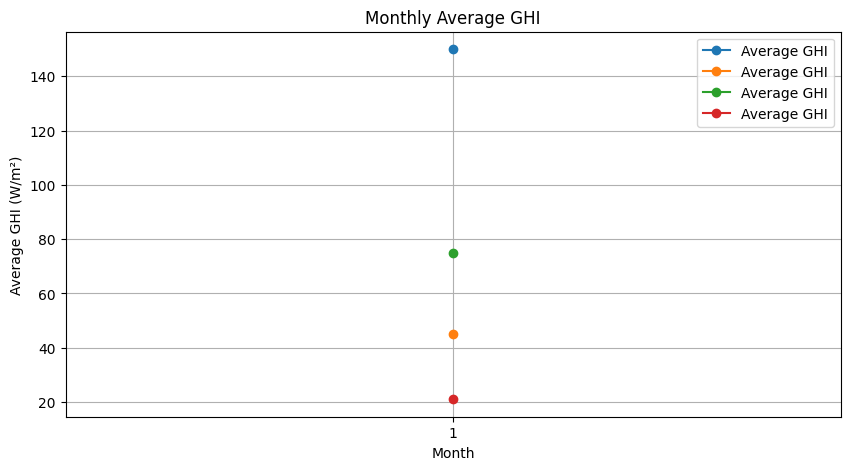

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(monthly_avg.index, monthly_avg[['GHI','DHI','DNI','Tamb']], marker='o', label='Average GHI')
plt.title('Monthly Average GHI')
plt.xlabel('Month')
plt.ylabel('Average GHI (W/m²)')
plt.xticks(monthly_avg.index)
plt.legend()
plt.grid()
plt.show()

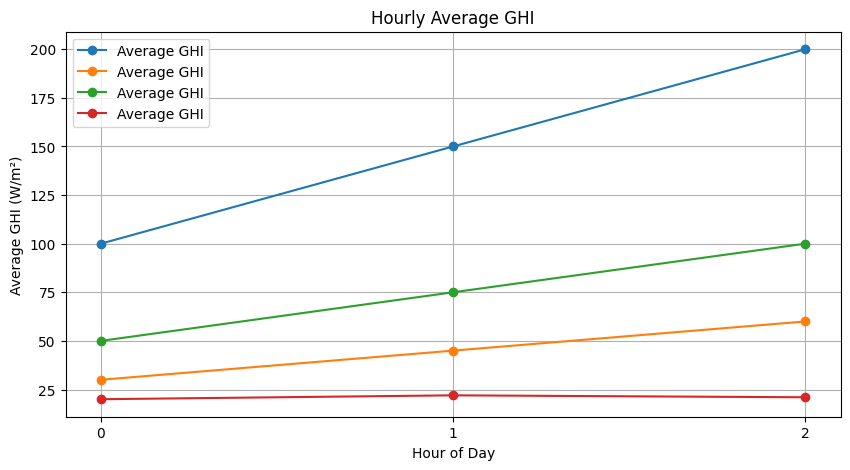

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(hourly_avg.index, hourly_avg[['GHI','DHI','DNI','Tamb']], marker='o', label='Average GHI')
plt.title('Hourly Average GHI')
plt.xlabel('Hour of Day')
plt.ylabel('Average GHI (W/m²)')
plt.xticks(hourly_avg.index)
plt.legend()
plt.grid()
plt.show()

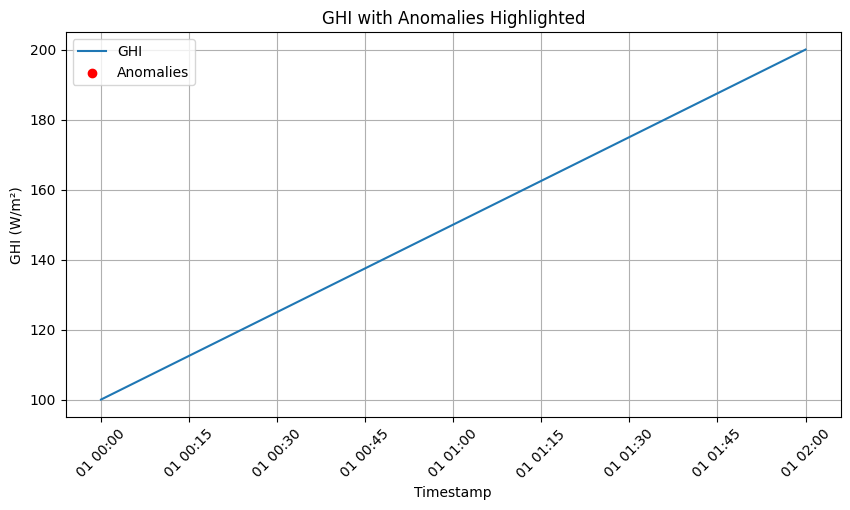

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.scatter(anomalies['Timestamp'], anomalies['GHI'], color='red', label='Anomalies')
plt.title('GHI with Anomalies Highlighted')
plt.xlabel('Timestamp')
plt.ylabel('GHI (W/m²)')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
averages = benin_dataset.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()
# Set the figure size
plt.figure(figsize=(8, 5))

# Bar plot
bar_width = 0.35
index = range(len(averages))

# Creating bars
bar1 = plt.bar(index, averages['ModA'], bar_width, label='ModA')
bar2 = plt.bar([i + bar_width for i in index], averages['ModB'], bar_width, label='ModB')

# Adding labels and title
plt.xlabel('Cleaning Flag')
plt.ylabel('Average Values')
plt.title('Average ModA & ModB Pre/Post-Clean')
plt.xticks([i + bar_width / 2 for i in index], averages['Cleaning'])
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

NameError: name 'sierraleone_dataset' is not defined

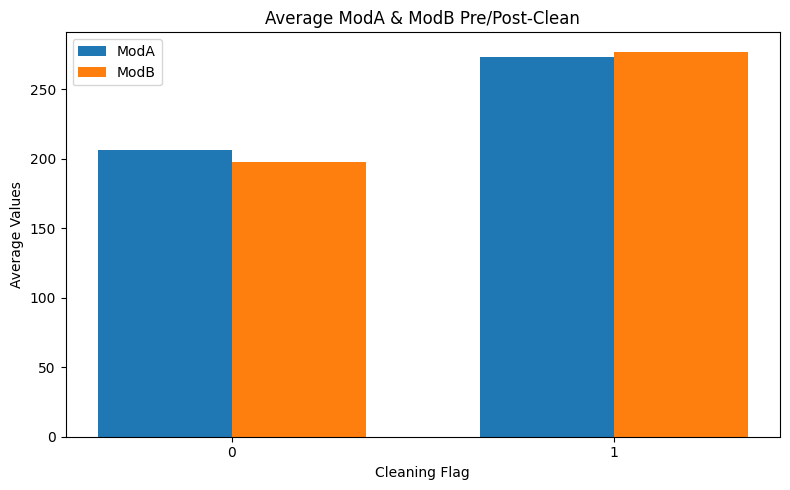

In [ ]:
averages = benin_dataset.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()
# Set the figure size
plt.figure(figsize=(8, 5))

# Bar plot
bar_width = 0.35
index = range(len(averages))

# Creating bars
bar1 = plt.bar(index, averages['ModA'], bar_width, label='ModA')
bar2 = plt.bar([i + bar_width for i in index], averages['ModB'], bar_width, label='ModB')

# Adding labels and title
plt.xlabel('Cleaning Flag')
plt.ylabel('Average Values')
plt.title('Average ModA & ModB Pre/Post-Clean')
plt.xticks([i + bar_width / 2 for i in index], averages['Cleaning'])
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

##### Cleaning Impact

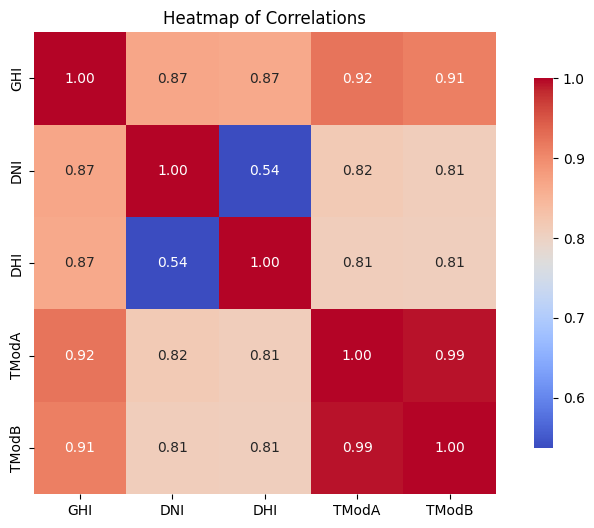

In [ ]:
import seaborn as sns
# Select relevant columns
data = benin_dataset[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']]

correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Adding title
plt.title('Heatmap of Correlations')

# Display the plot
plt.show()

##### Correlation & Relationship Analysis

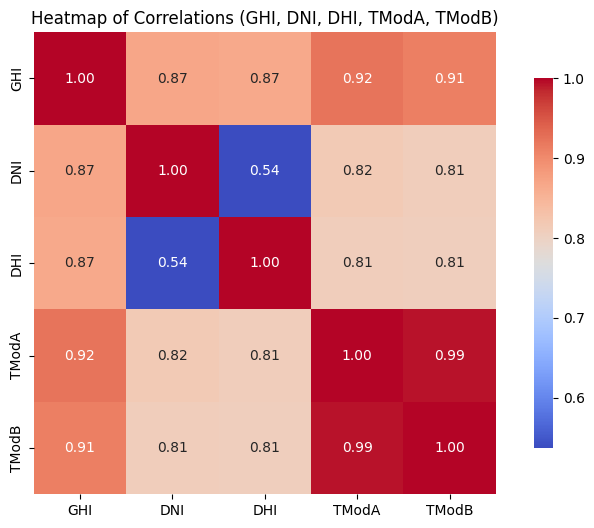

In [ ]:
data = benin_dataset[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']]
correlation_matrix = data.corr()
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Adding title
plt.title('Heatmap of Correlations (GHI, DNI, DHI, TModA, TModB)')

# Display the plot
plt.show()

##### ### Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI.

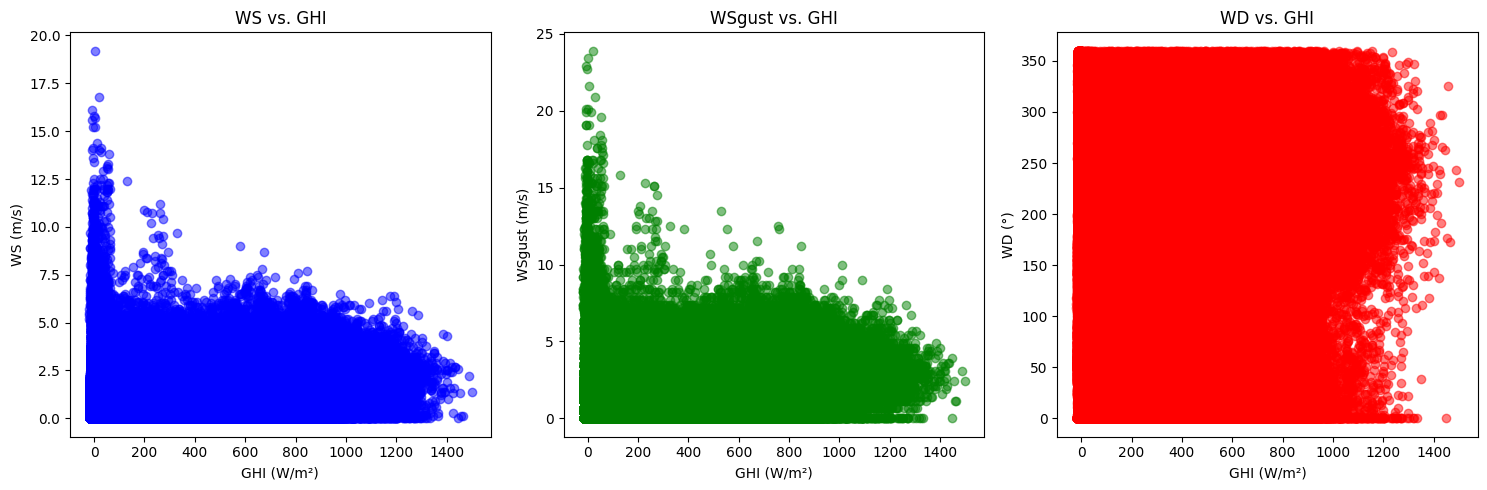

In [ ]:
# Set the figure size
plt.figure(figsize=(15, 5))

# Scatter plot for WS vs. GHI
plt.subplot(1, 3, 1)
plt.scatter(benin_dataset['GHI'], benin_dataset['WS'], alpha=0.5, color='blue')
plt.title('WS vs. GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('WS (m/s)')

# Scatter plot for WSgust vs. GHI
plt.subplot(1, 3, 2)
plt.scatter(benin_dataset['GHI'], benin_dataset['WSgust'], alpha=0.5, color='green')
plt.title('WSgust vs. GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('WSgust (m/s)')

# Scatter plot for WD vs. GHI
plt.subplot(1, 3, 3)
plt.scatter(benin_dataset['GHI'], benin_dataset['WD'], alpha=0.5, color='red')
plt.title('WD vs. GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('WD (°)')

plt.tight_layout()
plt.show()

###### Option A: RH vs. Tamb

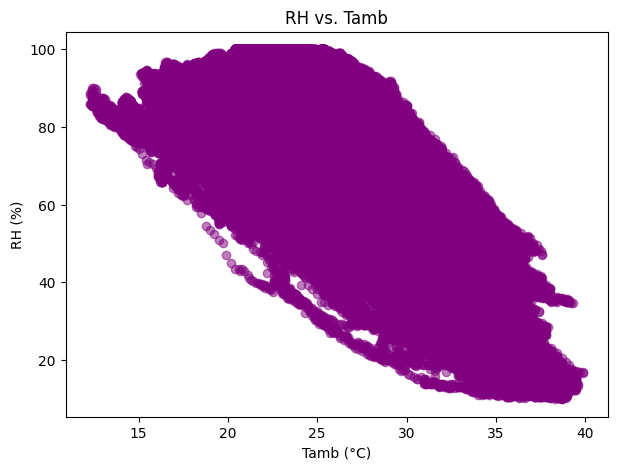

In [ ]:
plt.figure(figsize=(7, 5))

plt.scatter(benin_dataset['Tamb'], benin_dataset['RH'], alpha=0.5, color='purple')
plt.title('RH vs. Tamb')
plt.xlabel('Tamb (°C)')
plt.ylabel('RH (%)')

plt.show()

##### Option B: RH vs. GHI

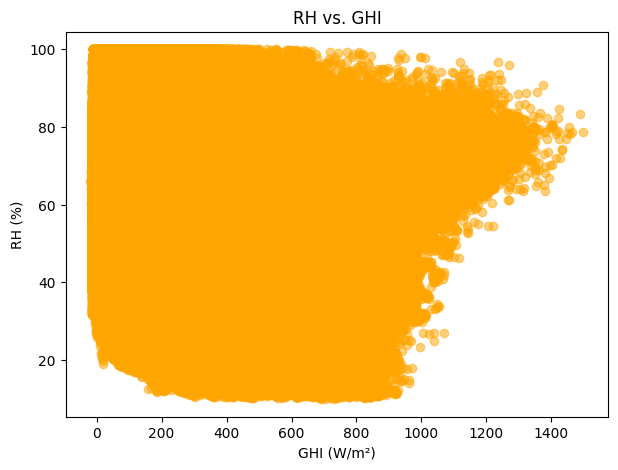

In [ ]:
plt.figure(figsize=(7, 5))

plt.scatter(benin_dataset['GHI'], benin_dataset['RH'], alpha=0.5, color='orange')
plt.title('RH vs. GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('RH (%)')

plt.show()

##### Wind & Distribution Analysis
##### Wind rose or radial bar plot of WS/WD.

In [ ]:
from windrose import WindroseAxes
# Create windrose plot
fig = plt.figure(figsize=(8, 6))
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(benin_dataset['WS'], benin_dataset["WD"], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title="Wind Speed (m/s)")
plt.title("Wind Rose Plot")
plt.show()

ModuleNotFoundError: No module named 'windrose'

In [31]:
##### Histograms for GHI and one other variable (e.g. WS).

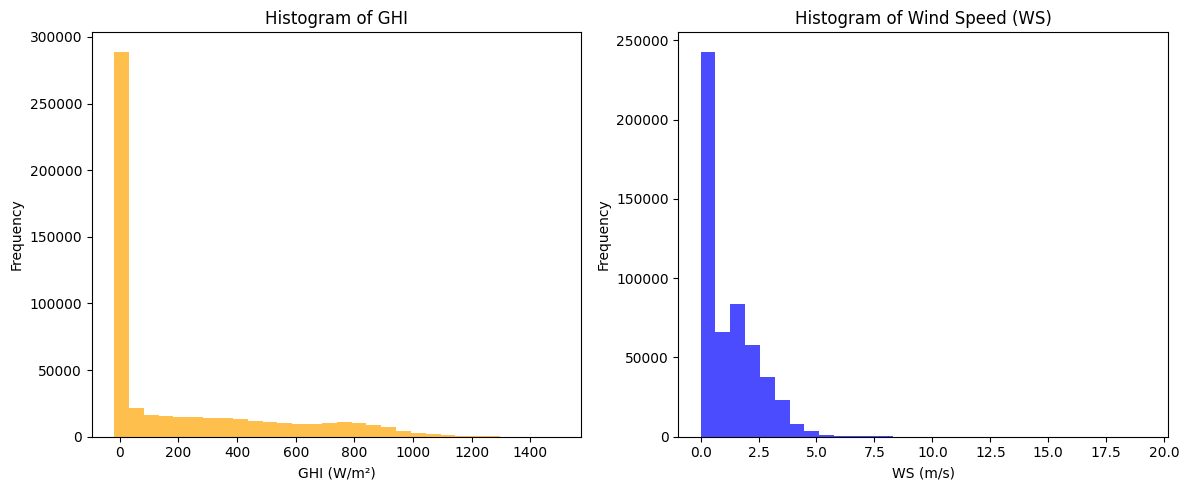

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 5))

# Histogram for GHI
plt.subplot(1, 2, 1)
plt.hist(benin_dataset['GHI'], bins=30, color='orange', alpha=0.7)
plt.title('Histogram of GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')

# Histogram for WS
plt.subplot(1, 2, 2)
plt.hist(benin_dataset['WS'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Wind Speed (WS)')
plt.xlabel('WS (m/s)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


###### Temprature Analysis

##### 1. Scatter Plots

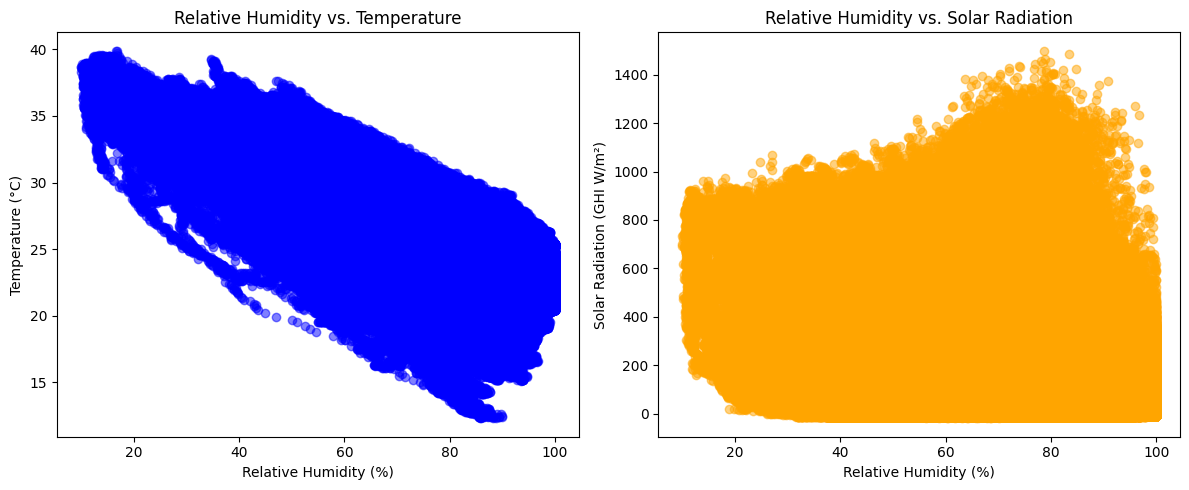

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 5))

# Scatter plot for RH vs. Temperature
plt.subplot(1, 2, 1)
plt.scatter(benin_dataset['RH'], benin_dataset['Tamb'], alpha=0.5, color='blue')
plt.title('Relative Humidity vs. Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
# Scatter plot for RH vs. GHI
plt.subplot(1, 2, 2)
plt.scatter(benin_dataset['RH'], benin_dataset['GHI'], alpha=0.5, color='orange')
plt.title('Relative Humidity vs. Solar Radiation')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Solar Radiation (GHI W/m²)')

plt.tight_layout()
plt.show()

##### 2. Statstical Analysis

In [ ]:
# Calculate correlation coefficients
correlation_temp = benin_dataset['RH'].corr(benin_dataset['Tamb'])
correlation_solar = benin_dataset['RH'].corr(df['GHI'])

print(f'Correlation between RH and Temperature: {correlation_temp:.2f}')
print(f'Correlation between RH and Solar Radiation: {correlation_solar:.2f}')

Correlation between RH and Temperature: -0.79
Correlation between RH and Solar Radiation: 0.87


##### Bubble Chart
##### Option 1: Using Relative Humidity (RH)

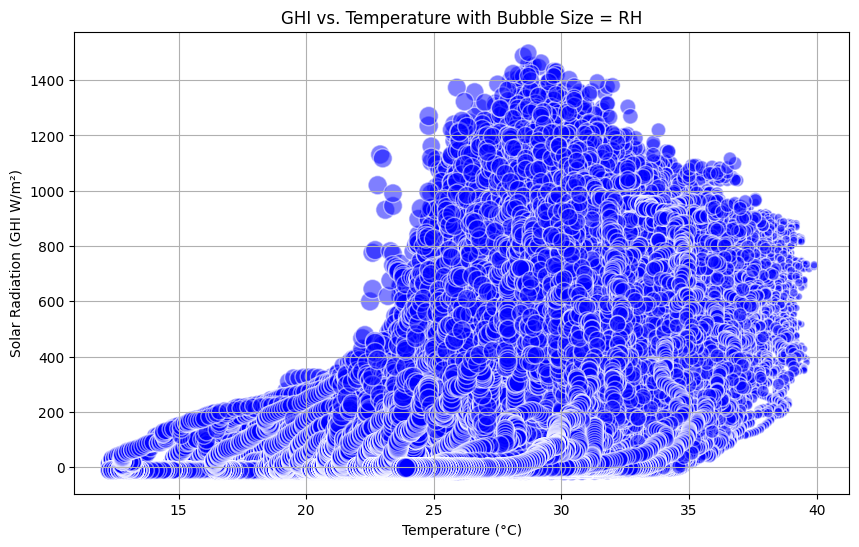

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create scatter plot with bubble sizes based on RH
plt.scatter(benin_dataset['Tamb'], benin_dataset['GHI'], s=benin_dataset['RH']*2, alpha=0.5, color='blue', edgecolors='w')

# Adding titles and labels
plt.title('GHI vs. Temperature with Bubble Size = RH')
plt.xlabel('Temperature (°C)')
plt.ylabel('Solar Radiation (GHI W/m²)')

plt.grid()
plt.show()